14:37:20 - cmdstanpy - INFO - Chain [1] start processing
14:37:21 - cmdstanpy - INFO - Chain [1] done processing


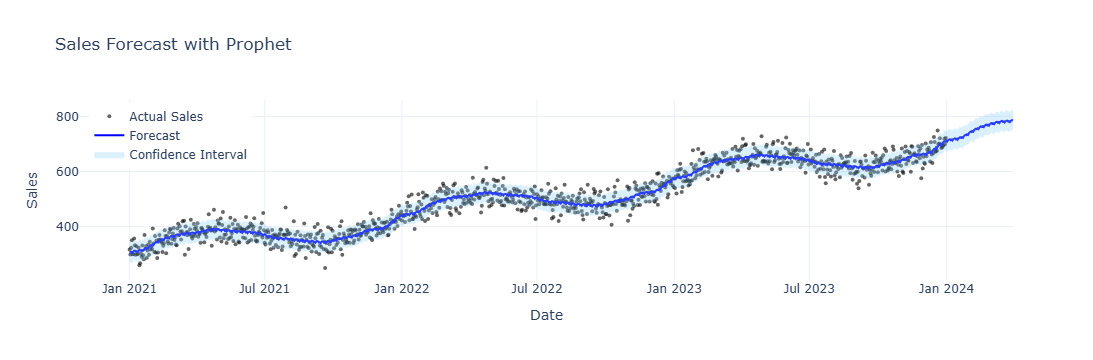

,ds,yhat,yhat_lower,yhat_upper
1170,2024-03-16,782.825210,746.862533,819.435644
1171,2024-03-17,777.712420,739.480461,813.450157
1172,2024-03-18,783.810670,749.346511,818.612866
1173,2024-03-19,778.781243,741.329235,817.959550
1174,2024-03-20,782.575528,746.113618,819.532352
1175,2024-03-21,785.597856,749.302091,824.221468
1176,2024-03-22,784.987088,747.346214,821.341137
1177,2024-03-23,784.109717,748.976905,819.658751
1178,2024-03-24,778.939665,741.932276,816.002594
1179,2024-03-25,785.027783,746.754980,821.468897


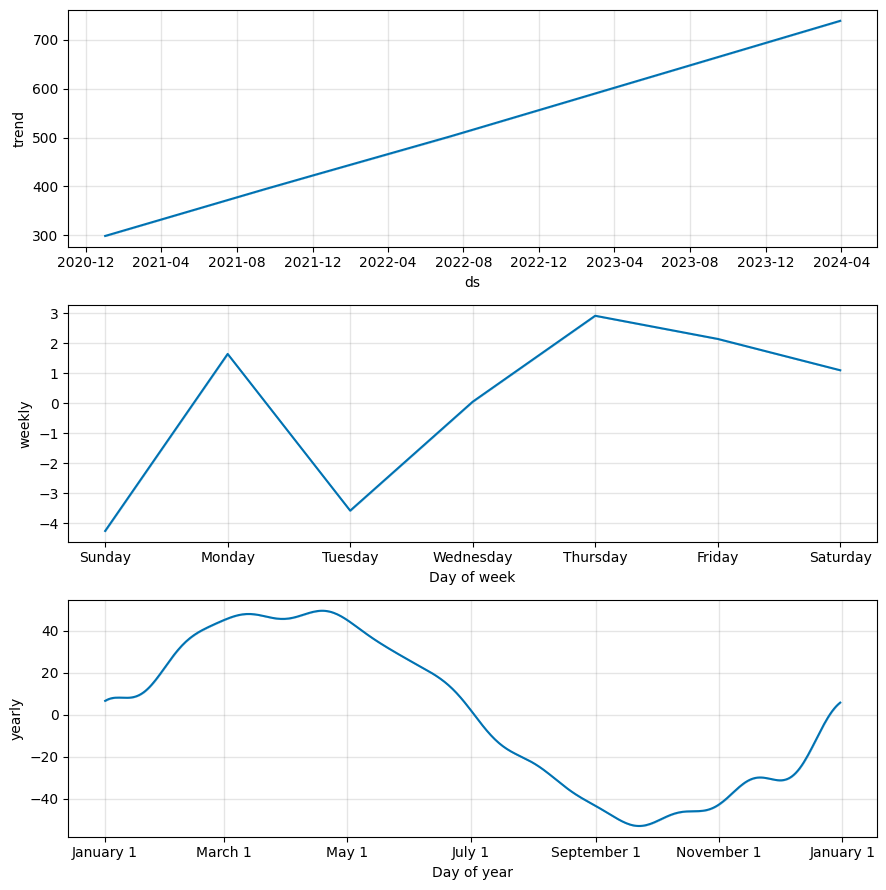

In [2]:
# pip install prophet
import pandas as pd
from prophet import Prophet

# load
df = pd.read_csv('sales.csv', parse_dates=['date'])
df = df.rename(columns={'date':'ds','sales':'y'})

# optional: aggregate to desired freq:
df = df.set_index('ds').resample('D').sum().reset_index()  # daily example

m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
# m.add_country_holidays(country_name='US')  # optional, choose your country
m.fit(df)

future = m.make_future_dataframe(periods=90, freq='D')
forecast = m.predict(future)

# --- Improved Plotly Forecast Plot ---
import plotly.graph_objects as go

fig = go.Figure()

# Actual sales
fig.add_trace(go.Scatter(
    x=df['ds'], y=df['y'],
    mode='markers',
    name='Actual Sales',
    marker=dict(color='black', size=4, opacity=0.6)
))

# Forecast line
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    mode='lines',
    name='Forecast',
    line=dict(color='blue', width=2)
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(135,206,250,0.3)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='Confidence Interval'
))

# Layout
fig.update_layout(
    title=" Sales Forecast with Prophet",
    xaxis_title="Date",
    yaxis_title="Sales",
    template="plotly_white",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

# Keep Prophet's built-in component plots
fig2 = m.plot_components(forecast)

# Show last 15 forecasted days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

